**Ankit kumar 2023H1030076P**

In [1]:
#User defined model is taken

#import libraries
import torch
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 64

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,num_workers=num_workers)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 52171084.66it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 1804601.70it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 3114733.24it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 8099714.61it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



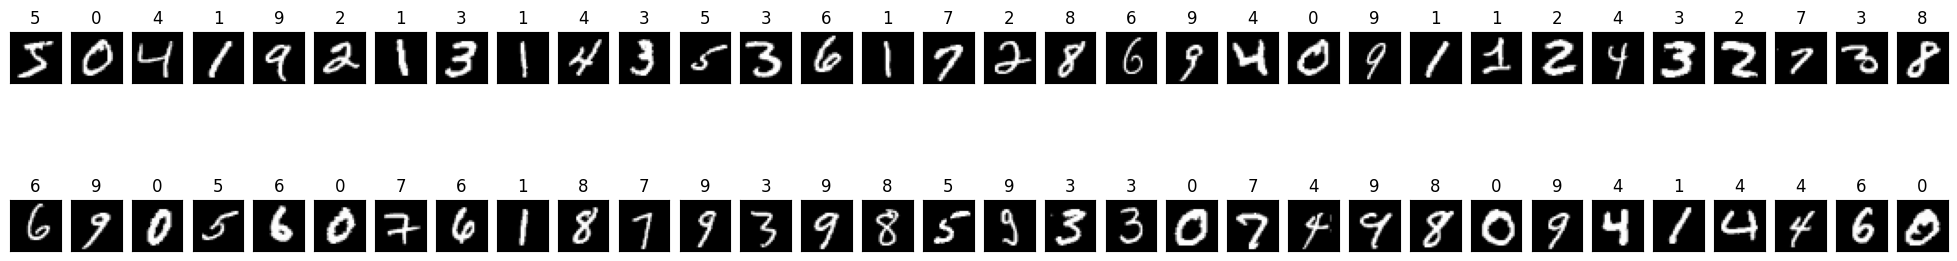

In [3]:
# Visualize a Batch of Training Data
#check loded data is correct or not
%matplotlib inline

# obtain one batch of training images
dataiter = iter(train_loader)
# images, labels = next(dataiter)
images, labels = next(dataiter)
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(64):
    ax = fig.add_subplot(2, 64//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

**View an image in More Detail**

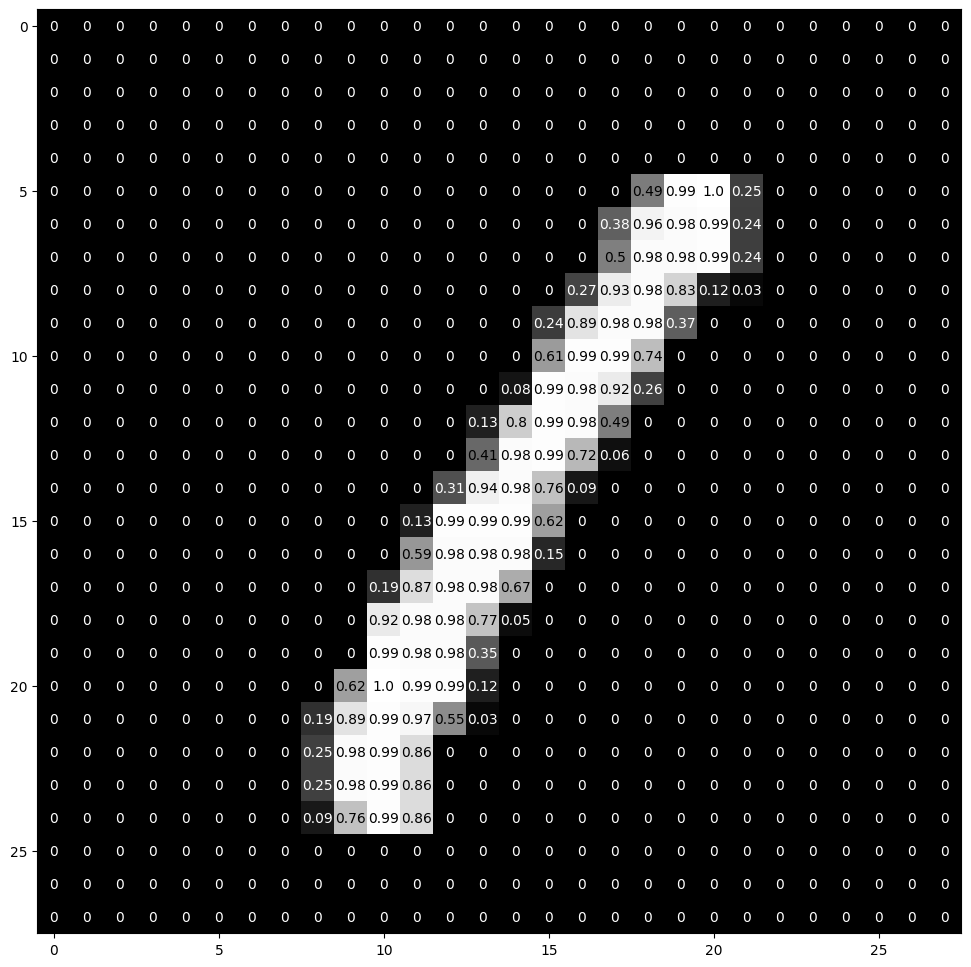

In [4]:
img = np.squeeze(images[3])

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [5]:
# Network Architecture
import torch.nn as nn
import torch.nn.functional as F

## Define the NN architecture

# Define the model architecture
class FeedForwardNN(nn.Module):
    def __init__(self):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 32)
        self.fc_out = nn.Linear(32, 10)
        self.dropout = nn.Dropout(0.3)
        self.layer_norm = nn.LayerNorm(32)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = self.dropout(torch.relu(self.bn1(self.fc1(x))))
        x = self.dropout(torch.relu(self.bn2(self.fc2(x))))
        x = self.dropout(torch.relu(self.fc3(x)))
        x = self.layer_norm(x)
        x = self.fc_out(x)
        return x



# Instantiate and print the model
model = FeedForwardNN()
print(model)

model = FeedForwardNN()
print(model)

FeedForwardNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc_out): Linear(in_features=32, out_features=10, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (layer_norm): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
)
FeedForwardNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc_out): Linear(in_features=32, out_features=10, bias=True)
  (dro

In [6]:
!pip install wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.8/313.8 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.0 MB/s eta 0:00:00


In [7]:
import wandb
wandb.login(key='d457ebb41dad92c507b8b358a16efdf52bf75136') # Open https://wandb.ai/settings#api and then tap Reveal or create a new key



wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [8]:
n_epochs = 100 # suggested training is between 20-50 epochs
wandb.init(
        # Set the project where this run will be logged
        project="deep-learning-labs_4 exercise",
        # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
        name=f"lab-number-4",
        # Track hyperparameters and run metadata
        config={
            "learning_rate": 0.001,
            "architecture": "FFNN",
            "dataset": "MNIST",
            "epochs": 30,
        })

wandb: Currently logged in as: id4ankit (id4ankit-bits-pilani). Use `wandb login --relogin` to force relogin


In [9]:
## Specify loss and optimization functions

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [10]:
model.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0

    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)

    # print training statistics
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)
    wandb.log({'Epoch':epoch,
        'trainloss':train_loss
        })
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        train_loss
        ))

Epoch: 1 	Training Loss: 0.961435
Epoch: 2 	Training Loss: 0.493837
Epoch: 3 	Training Loss: 0.406684
Epoch: 4 	Training Loss: 0.364126
Epoch: 5 	Training Loss: 0.326045
Epoch: 6 	Training Loss: 0.303291
Epoch: 7 	Training Loss: 0.282064
Epoch: 8 	Training Loss: 0.268001
Epoch: 9 	Training Loss: 0.252914
Epoch: 10 	Training Loss: 0.239701
Epoch: 11 	Training Loss: 0.230212
Epoch: 12 	Training Loss: 0.221845
Epoch: 13 	Training Loss: 0.219714
Epoch: 14 	Training Loss: 0.210303
Epoch: 15 	Training Loss: 0.202634
Epoch: 16 	Training Loss: 0.196280
Epoch: 17 	Training Loss: 0.195807
Epoch: 18 	Training Loss: 0.187101
Epoch: 19 	Training Loss: 0.182645
Epoch: 20 	Training Loss: 0.176721
Epoch: 21 	Training Loss: 0.177991
Epoch: 22 	Training Loss: 0.175493
Epoch: 23 	Training Loss: 0.173893
Epoch: 24 	Training Loss: 0.163925
Epoch: 25 	Training Loss: 0.163760
Epoch: 26 	Training Loss: 0.161014
Epoch: 27 	Training Loss: 0.156107
Epoch: 28 	Training Loss: 0.156441
Epoch: 29 	Training Loss: 0.1

In [11]:
# ## Specify loss and optimization functions

# # specify loss function
# criterion = nn.CrossEntropyLoss()

# # specify optimizer
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [13]:
# Initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()  # Prepare model for evaluation

# Iterate through the test data
for data, target in test_loader:
    # Forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)

    # Calculate the loss
    loss = criterion(output, target)

    # Update test loss
    test_loss += loss.item() * data.size(0)

    # Convert output probabilities to predicted class
    _, pred = torch.max(output, 1)

    # Compare predictions to true labels
    correct = pred.eq(target.data.view_as(pred))

    # Calculate test accuracy for each object class
    for i in range(target.size(0)):  # Iterate over the batch size directly
        label = target.data[i].item()  # Get the label as a standard Python int
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# Calculate and print average test loss
test_loss = test_loss / len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

# Print accuracy for each class
for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            int(class_correct[i]), int(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (i))

# Print overall test accuracy
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * sum(class_correct) / sum(class_total),
    int(sum(class_correct)), int(sum(class_total))))


Test Loss: 0.104394

Test Accuracy of     0: 99% (971/980)
Test Accuracy of     1: 99% (1127/1135)
Test Accuracy of     2: 97% (1006/1032)
Test Accuracy of     3: 98% (995/1010)
Test Accuracy of     4: 97% (959/982)
Test Accuracy of     5: 97% (867/892)
Test Accuracy of     6: 98% (939/958)
Test Accuracy of     7: 97% (1004/1028)
Test Accuracy of     8: 96% (941/974)
Test Accuracy of     9: 97% (980/1009)

Test Accuracy (Overall): 97% (9789/10000)
